#### Example running SpaFHy with jupyter notebook

In [1]:
from model_driver import driver
from iotools import read_results
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os

os.chdir(r'C:\SpaFHy_v1_Pallas_2D')

# example of calling driver, reading results
outputfile = driver(create_ncf=True, create_spinup=False, folder='testcase_input')
results = read_results(outputfile)

*** Defined soil IDs: {1.0, 2.0, 3.0, 4.0} Used soil IDs: {1.0, 2.0, 4.0}
*** State variables assigned from parameters.py ***
*** Distributed radiation used ***
*** Simulation forced with: testcase_input\forcing\FORCING_KENTTAROVA_final.csv


C:\SpaFHy_v1_Pallas_2D\canopygrid.py:761: RuntimeWarning: invalid value encountered in arccos
  dl = 2.0*np.arccos(cosZEN - np.sin(LAT)*np.sin(DECL) / (np.cos(LAT)*np.cos(DECL))) / CF / 15.0  # hours


*** Running model ***
*** 2D run
*** Bucket organic layer as in Launiainen et al., 2019
Running timestep:  1
Timestep: 1 iterations 11 0.00025939318317114157 0.00011346626615704736
Running timestep:  2
Timestep: 2 iterations 6 0.0009859067928346121 -0.005724133877492932
Running timestep:  3
Timestep: 3 iterations 12 0.0006544320610260002 -0.007997261673949652
Running timestep:  4
Timestep: 4 iterations 13 0.0006660561430180678 -0.008353417077728409
Running timestep:  5
Timestep: 5 iterations 13 0.0005767363167592521 -0.00817898909235737
Running timestep:  6
Timestep: 6 iterations 16 0.000703548220542416 -0.011108022636733494
Running timestep:  7
Timestep: 7 iterations 12 0.0007019117927598018 -0.008381744304756467
Running timestep:  8
Timestep: 8 iterations 13 0.0007964135368752068 -0.009269647260680358
Running timestep:  9
Timestep: 9 iterations 13 0.0007657198551669353 -0.009104898415387197
Running timestep:  10
Timestep: 10 iterations 14 0.0005408070450698688 -0.00962451332532055
Ru

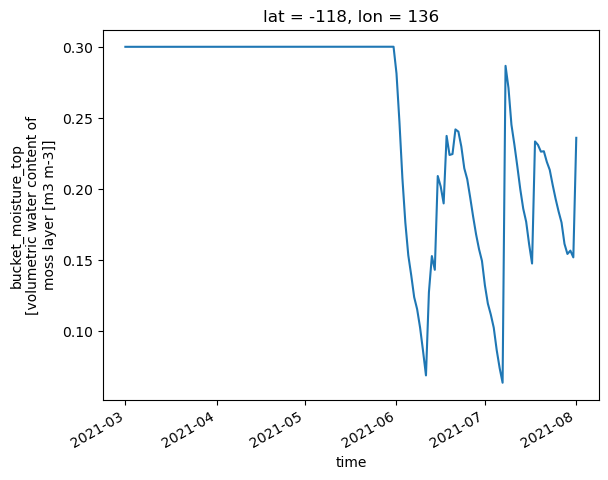

In [2]:
results['bucket_moisture_top'].sel(time=slice('2021-03-01', '2021-08-01'))[:,118,136].plot()

In [3]:
file = r'F:\SpaFHy_2D_2021\testcase_input_202401151359.nc' # org_drain = True
orig = xr.open_dataset(file)
# lomp 46, 54
# kent 118,136

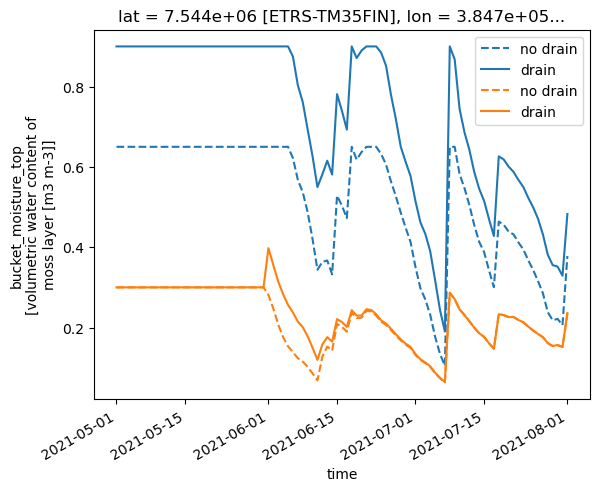

In [12]:
results['bucket_moisture_top'].sel(time=slice('2021-05-01', '2021-09-01'))[:,46, 54].plot(
    color='tab:blue', linestyle='--', label='no drain')
orig['bucket_moisture_top'].sel(time=slice('2021-05-01', '2021-09-01'))[:,46, 54].plot(
    color='tab:blue', label='drain')
#plt.title('Lompolo')

results['bucket_moisture_top'].sel(time=slice('2021-05-01', '2021-09-01'))[:,118,136].plot(
    color='tab:orange', linestyle='--', label='no drain')
orig['bucket_moisture_top'].sel(time=slice('2021-05-01', '2021-09-01'))[:,118,136].plot(
    color='tab:orange', label='drain')
#plt.title('Kenttärova')

plt.legend()

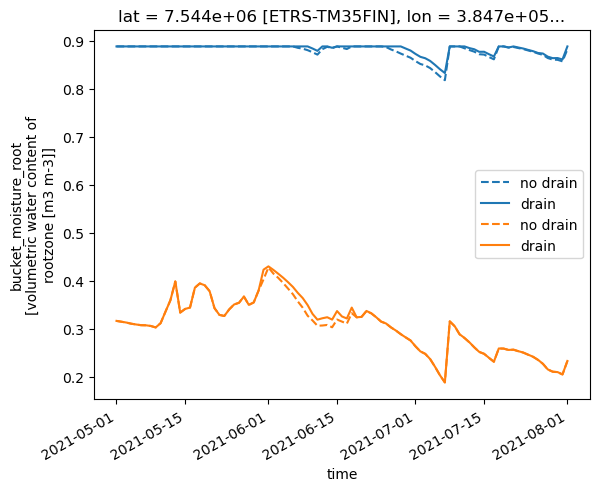

In [8]:
results['bucket_moisture_root'].sel(time=slice('2021-05-01', '2021-09-01'))[:,46, 54].plot(
    color='tab:blue', linestyle='--', label='no drain')
orig['bucket_moisture_root'].sel(time=slice('2021-05-01', '2021-09-01'))[:,46, 54].plot(
    color='tab:blue', label='drain')
#plt.title('Lompolo')

results['bucket_moisture_root'].sel(time=slice('2021-05-01', '2021-09-01'))[:,118,136].plot(
    color='tab:orange', linestyle='--', label='no drain')
orig['bucket_moisture_root'].sel(time=slice('2021-05-01', '2021-09-01'))[:,118,136].plot(
    color='tab:orange', label='drain')
#plt.title('Kenttärova')

plt.legend()

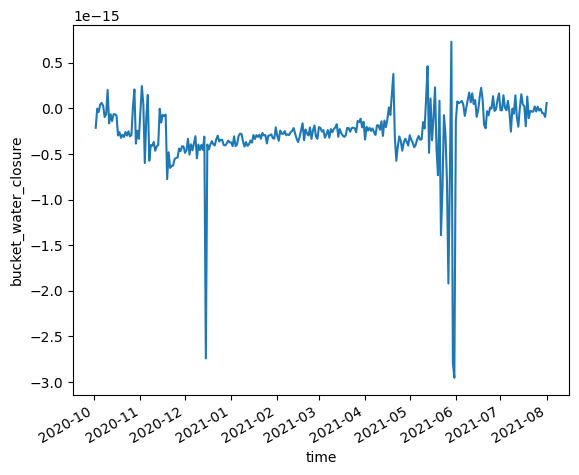

In [11]:
orig['bucket_water_closure'].mean(dim=['lat','lon']).plot()